## AIM

to predict the future numbers of restaurant visitors


### Quick Data Info:

- data from two sites: air and hpg
- dates from: 2016 to April 2017
- test set: last week of April and May of 2017


In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
air_reserve = pd.read_csv('input/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_reserve = pd.read_csv('input/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
#hpg or air store info: store id, genre name, area name, lat, long.
air_store_info = pd.read_csv('input/air_store_info.csv')
hpg_store_info = pd.read_csv('input/hpg_store_info.csv')
#allows you to join select restaurants that have both the air and hpg system
store_relation = pd.read_csv('input/store_id_relation.csv')
date_info = pd.read_csv('input/date_info.csv',parse_dates=['calendar_date'])
# historical visit data for the air restaurants.
air_visit = pd.read_csv('input/air_visit_data.csv',parse_dates=['visit_date'])
sample_submission = pd.read_csv('input/sample_submission.csv')

In [3]:
air_visit.visit_date.nunique()

478

plot the total number of visitors per day over the full training time range 

together with the median visitors per day of the week and month of the year:

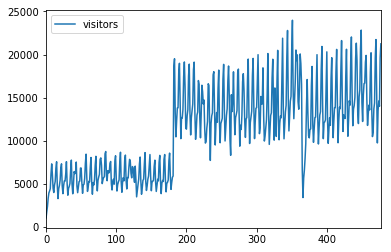

In [5]:
df2 = air_visit.groupby('visit_date').sum().reset_index()
df2.plot()

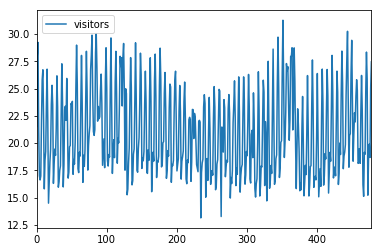

In [6]:
df2 = air_visit.groupby('visit_date').mean().reset_index()
df2.plot()

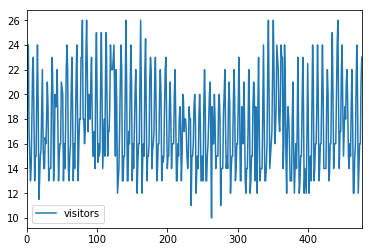

In [7]:
df2 = air_visit.groupby('visit_date').median().reset_index()
df2.plot()

In [15]:
df2.shape

(478, 2)

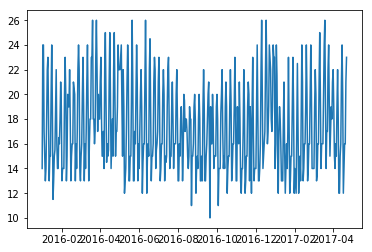

In [8]:
plt.plot(df2['visit_date'], df2['visitors'], linestyle='-', label = 'nb. of visits')


In [5]:
def numeric_EDA(df):
    print("col types: \n")
    print(df.info())
    print("\n check head: \n")
    print(df.head())
    print("\n stat summary: \n")
    print(df.describe())
    print("\n check if any null/nan value: ")
    print(df.isnull().values.any()) 
    if df.isnull().values.any():
        print("\n if nan present, sum-up all nan's: ")
        print(df.isnull().sum())

In [11]:
#numeric_EDA(air_reserve)

In [12]:
#numeric_EDA(hpg_reserve)

In [13]:
#numeric_EDA(air_store_info)

In [14]:
#numeric_EDA(hpg_store_info)

In [15]:
#numeric_EDA(air_visit)

In [16]:
#numeric_EDA(date_info)

In [17]:
#numeric_EDA(store_relation)

new features can be as simple as deriving the day of the week or the month from a date column; 

In [19]:
hpg_reserve['visit_year'] = hpg_reserve['visit_datetime'].dt.year
hpg_reserve['visit_month'] = hpg_reserve['visit_datetime'].dt.month
hpg_reserve['visit_day'] = hpg_reserve['visit_datetime'].dt.day
hpg_reserve['reserve_year'] = hpg_reserve['reserve_datetime'].dt.year
hpg_reserve['reserve_month'] = hpg_reserve['reserve_datetime'].dt.month
hpg_reserve['reserve_day'] = hpg_reserve['reserve_datetime'].dt.day

In [20]:
hpg_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)


In [21]:
hpg_reserve = hpg_reserve.groupby(['hpg_store_id', 'visit_year', 'visit_month',\
                                   'visit_day','reserve_year','reserve_month','reserve_day'], as_index=False).sum()
hpg_reserve.head()

,hpg_store_id,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors
0,hpg_001112ef76b9802c,2016,2,26,2016,2,9,9
1,hpg_001112ef76b9802c,2016,3,17,2016,3,3,3
2,hpg_001112ef76b9802c,2016,3,31,2016,3,25,5
3,hpg_001112ef76b9802c,2016,4,5,2016,4,1,13
4,hpg_001112ef76b9802c,2016,4,18,2016,4,15,9


In [22]:
air_reserve['visit_year'] = air_reserve['visit_datetime'].dt.year
air_reserve['visit_month'] = air_reserve['visit_datetime'].dt.month
air_reserve['visit_day'] = air_reserve['visit_datetime'].dt.day
air_reserve['reserve_year'] = air_reserve['reserve_datetime'].dt.year
air_reserve['reserve_month'] = air_reserve['reserve_datetime'].dt.month
air_reserve['reserve_day'] = air_reserve['reserve_datetime'].dt.day

air_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)

date_info['calendar_year'] = date_info['calendar_date'].dt.year
date_info['calendar_month'] = date_info['calendar_date'].dt.month
date_info['calendar_day'] = date_info['calendar_date'].dt.day

date_info.drop(['calendar_date'], axis=1, inplace=True)

air_visit['visit_year'] = air_visit['visit_date'].dt.year
air_visit['visit_month'] = air_visit['visit_date'].dt.month
air_visit['visit_day'] = air_visit['visit_date'].dt.day

#air_visit.drop(['visit_date'], axis=1, inplace=True)

In [23]:
air_reserve.head()

,air_store_id,reserve_visitors,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day
0,air_877f79706adbfb06,1,2016,1,1,2016,1,1
1,air_db4b38ebe7a7ceff,3,2016,1,1,2016,1,1
2,air_db4b38ebe7a7ceff,6,2016,1,1,2016,1,1
3,air_877f79706adbfb06,2,2016,1,1,2016,1,1
4,air_db80363d35f10926,5,2016,1,1,2016,1,1


In [24]:
hpg_reserve = pd.merge(hpg_reserve, store_relation, on='hpg_store_id', how='inner')
hpg_reserve.drop(['hpg_store_id'], axis=1, inplace=True)
hpg_reserve.head()


,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors,air_store_id
0,2016,1,9,2016,1,7,2,air_cbe867adcf44e14f
1,2016,1,11,2016,1,10,8,air_cbe867adcf44e14f
2,2016,1,14,2016,1,6,11,air_cbe867adcf44e14f
3,2016,1,15,2016,1,13,8,air_cbe867adcf44e14f
4,2016,1,18,2016,1,15,9,air_cbe867adcf44e14f


In [25]:
air_reserve = pd.concat([air_reserve, hpg_reserve])
air_reserve.head()

,air_store_id,reserve_day,reserve_month,reserve_visitors,reserve_year,visit_day,visit_month,visit_year
0,air_877f79706adbfb06,1,1,1,2016,1,1,2016
1,air_db4b38ebe7a7ceff,1,1,3,2016,1,1,2016
2,air_db4b38ebe7a7ceff,1,1,6,2016,1,1,2016
3,air_877f79706adbfb06,1,1,2,2016,1,1,2016
4,air_db80363d35f10926,1,1,5,2016,1,1,2016


In [26]:
air_reserve = air_reserve.groupby(['air_store_id', 'visit_year', 'visit_month','visit_day'],\
                as_index=False).sum().drop(['reserve_day','reserve_month','reserve_year'], axis=1)
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors
0,air_00a91d42b08b08d9,2016,1,14,2
1,air_00a91d42b08b08d9,2016,1,15,4
2,air_00a91d42b08b08d9,2016,1,16,2
3,air_00a91d42b08b08d9,2016,1,22,2
4,air_00a91d42b08b08d9,2016,1,29,5


In [27]:
air_reserve = pd.merge(air_reserve, date_info, left_on=['visit_year','visit_month','visit_day'], right_on=['calendar_year','calendar_month','calendar_day'], how='left')
air_reserve.drop(['calendar_year','calendar_month','calendar_day'], axis=1, inplace=True)
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0


In [28]:
air_reserve = pd.merge(air_reserve, air_store_info, on='air_store_id', how='left')
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [29]:
air_visit.head()

,air_store_id,visitors,visit_year,visit_month,visit_day
0,air_ba937bf13d40fb24,25,2016,1,13
1,air_ba937bf13d40fb24,32,2016,1,14
2,air_ba937bf13d40fb24,29,2016,1,15
3,air_ba937bf13d40fb24,22,2016,1,16
4,air_ba937bf13d40fb24,6,2016,1,18


In [30]:
df = pd.merge(air_reserve, air_visit, on=['air_store_id','visit_year','visit_month','visit_day'], how='left')

In [31]:
df.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,visitors
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 12 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
day_of_week         42193 non-null object
holiday_flg         42193 non-null int64
air_genre_name      42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visitors            35698 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 4.2+ MB


In [33]:
df.air_genre_name = df.air_genre_name.replace(' ', '_', regex=True)
df.air_genre_name = df.air_genre_name.replace('/', '_', regex=True)
df=df.rename(columns = {'air_genre_name':'genre','day_of_week':'dow'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 12 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
dow                 42193 non-null object
holiday_flg         42193 non-null int64
genre               42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visitors            35698 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 4.2+ MB


In [35]:
df_t = df[df.visitors.notnull()]
df_t.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visitors
26,air_00a91d42b08b08d9,2016,7,1,1,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,35.0
27,air_00a91d42b08b08d9,2016,7,6,7,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,29.0
28,air_00a91d42b08b08d9,2016,7,8,9,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,42.0
29,air_00a91d42b08b08d9,2016,7,9,6,Saturday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,11.0
30,air_00a91d42b08b08d9,2016,7,13,4,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,36.0


In [39]:
df.groupby(['visit_year','visit_month']).sum()

visit_day  reserve_visitors  holiday_flg  \
visit_year visit_month                                             
2016       1                28906             14790           79   
           2                27517             17145           48   
           3                35271             25068          122   
           4                31950             20112           82   
           5                23321             14063          200   
           6                20606             10851            0   
           7                21321             11397           31   
           8                17661              6216          149   
           9                16921              6382           50   
           10               31794             14077           27   
           11               65672             52978          232   
           12               85153             98027          621   
2017       1                69043             56086          270   
           2                59596             57750          178   
           3                79391             73960          118   
           4                56441             52388          102   
           5                 5475              5719          142   

                             latitude      longitude  visitors  
visit_year visit_month                                          
2016       1             56692.730917  215845.724408   25942.0  
           2             63811.922232  242414.907726   27090.0  
           3             76040.723300  289449.098092   38489.0  
           4             70319.128961  267907.135659   32668.0  
           5             56573.109223  215436.897175   23887.0  
           6             47269.120869  179504.658206   16454.0  
           7             50969.023280  192984.514154   35563.0  
           8             40484.101919  153079.561554   25779.0  
           9             39263.311094  148732.519770   25968.0  
           10            55918.146948  212047.819529   38947.0  
           11           150815.631986  572286.424379   97067.0  
           12           188670.035654  716310.816312  154711.0  
2017       1            144457.326464  547328.081116   96762.0  
           2            147472.532957  559543.338914   99714.0  
           3            173691.045157  659375.146486  135442.0  
           4            139593.245828  530011.350930   83941.0  
           5             19706.247427   75016.162855       NaN

In [36]:
df_m = df_t.groupby('visit_year').sum()

df2 = air_visit.groupby('visit_date').sum().reset_index()


(42193, 12)

In [37]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35698 entries, 26 to 42192
Data columns (total 12 columns):
air_store_id        35698 non-null object
visit_year          35698 non-null int64
visit_month         35698 non-null int64
visit_day           35698 non-null int64
reserve_visitors    35698 non-null int64
dow                 35698 non-null object
holiday_flg         35698 non-null int64
genre               35698 non-null object
air_area_name       35698 non-null object
latitude            35698 non-null float64
longitude           35698 non-null float64
visitors            35698 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.5+ MB


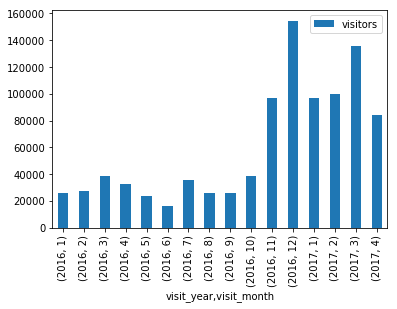

In [38]:
df_t[['visit_month','visitors','visit_year']].groupby(['visit_year','visit_month']).sum().plot(kind ="bar", y='visitors')

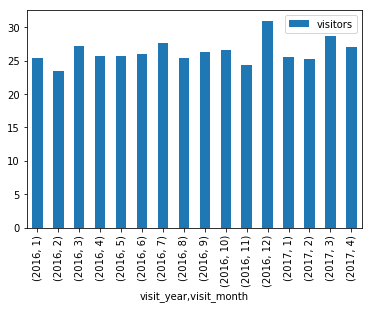

In [39]:
df_t[['visit_month','visitors','visit_year']].groupby(['visit_year','visit_month']).mean().plot(kind ="bar", y='visitors')

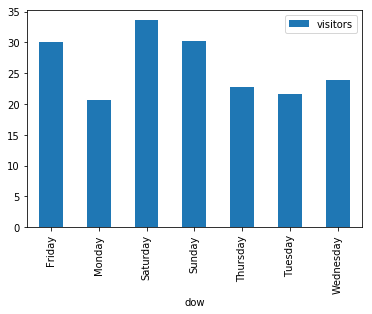

In [43]:
df_t[['visitors','dow']].groupby(['dow']).mean().plot(kind ="bar", y='visitors')

In [46]:
df_t[['visitors','dow']].groupby(['dow']).sum().plot(kind ="bar", y='visitors')

KeyError: "['dow'] not in index"

In [42]:
df_t.head(2)

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visitors
26,air_00a91d42b08b08d9,2016,7,1,1,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,35.0
27,air_00a91d42b08b08d9,2016,7,6,7,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,29.0


In [44]:
df_t = pd.get_dummies(df_t, columns=['genre','dow'])
df_t.drop(['air_store_id','air_area_name','latitude','longitude'], axis=1, inplace=True)
df_t.head()

,visit_year,visit_month,visit_day,reserve_visitors,holiday_flg,visitors,genre_Asian,genre_Bar_Cocktail,genre_Cafe_Sweets,genre_Creative_cuisine,...,genre_Other,genre_Western_food,genre_Yakiniku_Korean_food,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
26,2016,7,1,1,0,35.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27,2016,7,6,7,0,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,2016,7,8,9,0,42.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29,2016,7,9,6,0,11.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30,2016,7,13,4,0,36.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35698 entries, 26 to 42192
Data columns (total 27 columns):
visit_year                            35698 non-null int64
visit_month                           35698 non-null int64
visit_day                             35698 non-null int64
reserve_visitors                      35698 non-null int64
holiday_flg                           35698 non-null int64
visitors                              35698 non-null float64
genre_Asian                           35698 non-null uint8
genre_Bar_Cocktail                    35698 non-null uint8
genre_Cafe_Sweets                     35698 non-null uint8
genre_Creative_cuisine                35698 non-null uint8
genre_Dining_bar                      35698 non-null uint8
genre_International_cuisine           35698 non-null uint8
genre_Italian_French                  35698 non-null uint8
genre_Izakaya                         35698 non-null uint8
genre_Japanese_food                   35698 non-null uint8
gen

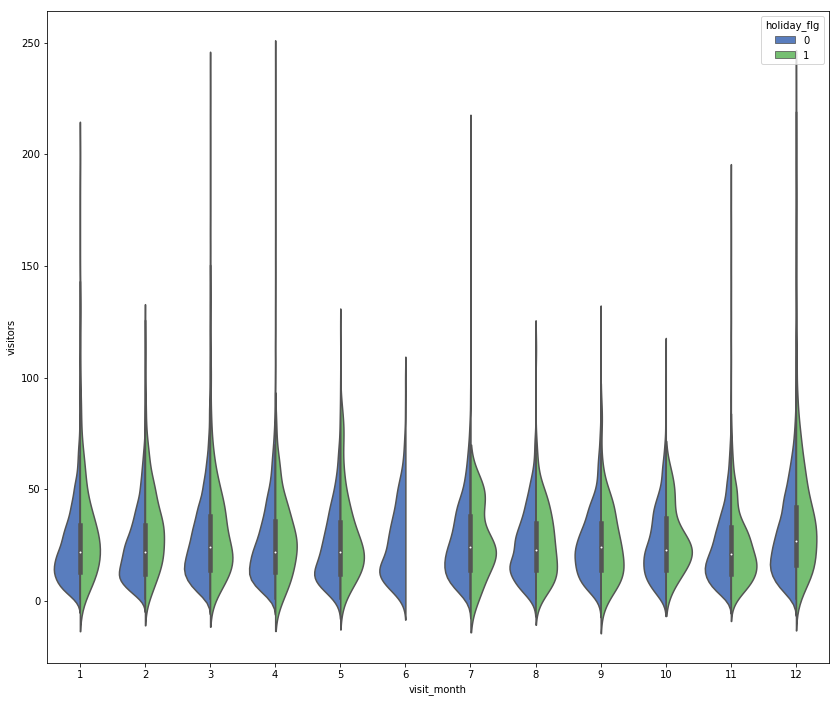

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12));
ax = sns.violinplot(x='visit_month', y="visitors", hue='holiday_flg',data=df, palette="muted", split=True)

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [50]:
df_t.drop(['reserve_visitors'],axis=1,inplace=True)
df_t.head(2)

,visit_year,visit_month,visit_day,holiday_flg,visitors,genre_Asian,genre_Bar_Cocktail,genre_Cafe_Sweets,genre_Creative_cuisine,genre_Dining_bar,...,genre_Other,genre_Western_food,genre_Yakiniku_Korean_food,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
26,2016,7,1,0,35.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27,2016,7,6,0,29.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
X_t = df_t.drop('visitors', axis=1)
y_t = df_t['visitors'].values

In [54]:
y_t1 = df_t['visitors']

In [57]:
y_t1[0:10]

26    35.0
27    29.0
28    42.0
29    11.0
30    36.0
31     5.0
32    19.0
33    47.0
34    53.0
35    24.0
Name: visitors, dtype: float64

In [58]:
X_t.head()

,visit_year,visit_month,visit_day,holiday_flg,genre_Asian,genre_Bar_Cocktail,genre_Cafe_Sweets,genre_Creative_cuisine,genre_Dining_bar,genre_International_cuisine,...,genre_Other,genre_Western_food,genre_Yakiniku_Korean_food,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
26,2016,7,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27,2016,7,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,2016,7,8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29,2016,7,9,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30,2016,7,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t1, test_size=0.2, random_state=42)

In [60]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
y_pred = regr.predict(X_test)

In [62]:
y_pred

array([ 48.22285714,  27.80828388,  42.98314482, ...,  34.06812776,
        16.24166667,  22.41079509])

In [68]:
y_test = y_test.values

In [65]:
def RMSLE(predicted, actual):
    msle = (np.log(predicted+1) - np.log(actual+1))**2
    rmsle = np.sqrt(msle.sum()/msle.count())
    return rmsle

In [66]:
RMSLE(y_pred,y_test.values)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [70]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

RMSE: 0.774200604323


In [72]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
predictions = enet.predict(X_test)

In [74]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(predictions))))

RMSE: 0.783527997956


In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predictions = lm.predict(X_test)

In [76]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(lm_predictions))))

RMSE: 0.761856703601


In [77]:
print('R2:', metrics.r2_score(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, predictions))
print('R2:', metrics.r2_score(y_test, lm_predictions))

R2: 0.0376154455588
R2: 0.0693078667123
R2: 0.101883628327


In [78]:
print('EVS:', metrics.explained_variance_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

EVS: 0.0693089754621
MAE: 13.4123857044
MSE: 303.157947067
RMSE: 17.4114315054
R2: 0.0693078667123


In [79]:
ts = pd.read_csv('input/air_visit_data.csv',parse_dates=['visit_date'], index_col='visit_date')

In [80]:
ts.head()

,air_store_id,visitors
visit_date,,
2016-01-13,air_ba937bf13d40fb24,25
2016-01-14,air_ba937bf13d40fb24,32
2016-01-15,air_ba937bf13d40fb24,29
2016-01-16,air_ba937bf13d40fb24,22
2016-01-18,air_ba937bf13d40fb24,6


In [81]:
ts.drop('air_store_id',inplace=True,axis=1)

In [82]:
ts.head()

,visitors
visit_date,
2016-01-13,25
2016-01-14,32
2016-01-15,29
2016-01-16,22
2016-01-18,6


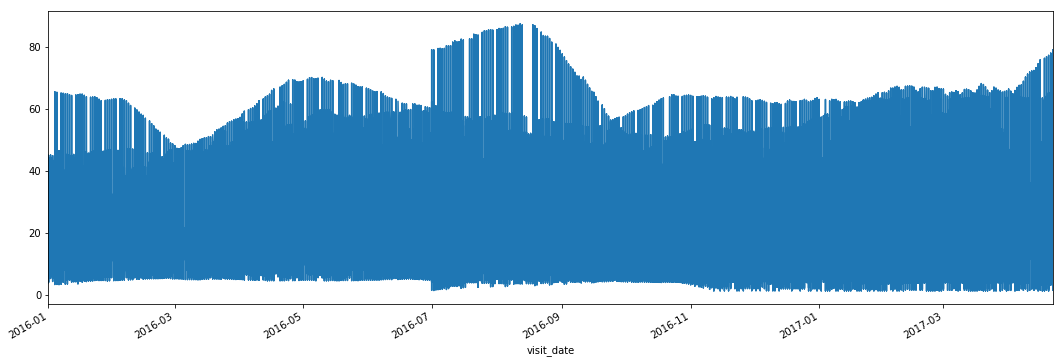

In [116]:
timeseries = ts['visitors']
timeseries.rolling(90).mean().plot(figsize=(18,6))

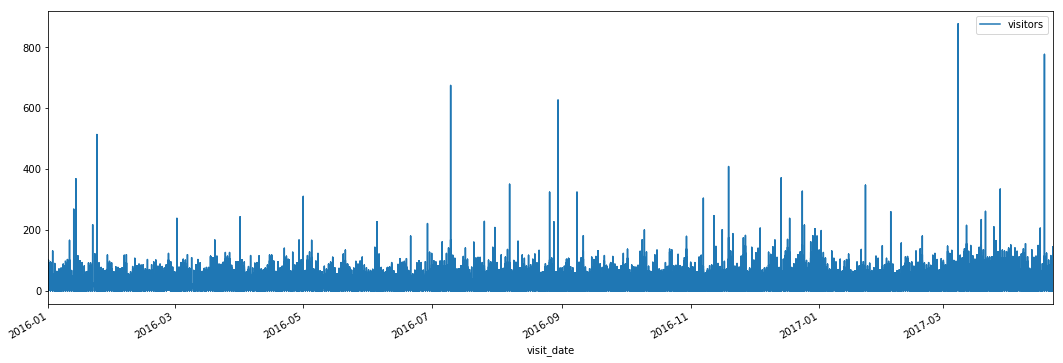

In [113]:
ts.plot(figsize=(18,6))

In [88]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(ts, order=(7,0,0))

In [93]:
ts2 = pd.read_csv('input/air_visit_data.csv',header=0,parse_dates=['visit_date'], index_col='visit_date',squeeze=True)

In [95]:
ts2.drop('air_store_id',axis=1,inplace=True)

In [101]:
ts2['visitors'] = ts2['visitors'].astype(float)

In [102]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252108 entries, 2016-01-13 to 2017-04-22
Data columns (total 1 columns):
visitors    252108 non-null float64
dtypes: float64(1)
memory usage: 3.8 MB


In [103]:
model7 = ARIMA(ts2, order=(7,0,0))

In [104]:
model7_fit = model7.fit(disp=0)
print(model7_fit.summary())


                              ARMA Model Results                              
Dep. Variable:               visitors   No. Observations:               252108
Model:                     ARMA(7, 0)   Log Likelihood             -997218.725
Method:                       css-mle   S.D. of innovations             12.636
Date:                Wed, 31 Jan 2018   AIC                        1994455.450
Time:                        14:27:14   BIC                        1994549.388
Sample:                    01-13-2016   HQIC                       1994482.823
                         - 04-22-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.9725      0.203    103.410      0.000      20.575      21.370
ar.L1.visitors     0.1995      0.002    102.401      0.000       0.196       0.203
ar.L2.visitors     0.0319      0.002

NameError: name 'pyplot' is not defined

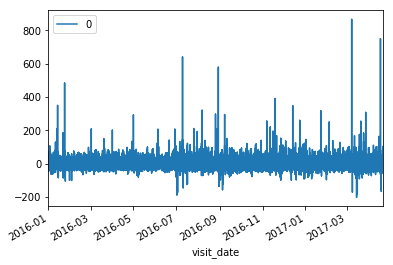

In [107]:
# plot residual errors
residuals = pd.DataFrame(model7_fit.resid)
residuals.plot()


                   0
count  252108.000000
mean       -0.000104
std        12.636424
min      -201.335387
25%        -6.430200
50%        -1.286779
75%         5.204010
max       866.490128


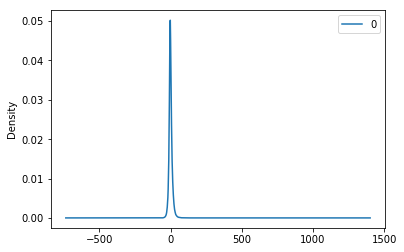

In [108]:
residuals.plot(kind='kde')
print(residuals.describe())